In [1]:
import sympy
sympy.init_printing()

[Link to paper](http://articles.adsabs.harvard.edu/pdf/1979IAUS...83..401T)

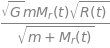

In [9]:
m = sympy.Symbol('m', positive=True) # Mass of the compact object
t = sympy.Symbol('t', positive=True) # Time
M_r = sympy.Function('M_r', positive=True) # Primary mass
G = sympy.Symbol('G', positive=True) # Gravitation constant
R = sympy.Function('R', positive=True) # Separation between centres
eqn_1 = m*M_r(t)*sympy.sqrt(G*R(t)/(m+M_r(t)))
eqn_1

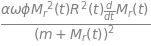

In [10]:
phi = sympy.Symbol('phi', positive=True) # Dimensionless frequency
omega = sympy.Symbol('omega', positive=True) # Keplerian frequency
alpha = sympy.Symbol('alpha', positive=True) # Torque efficiency
eqn_2 = alpha*M_r(t).diff(t)*phi*omega*R(t)**2*M_r(t)**2/(M_r(t)+m)**2
eqn_2

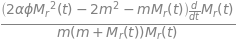

In [22]:
temp = eqn_1.diff(t)
temp = temp - eqn_2
temp = sympy.solve(temp, R(t).diff(t))[0]/R(t)
temp = temp.subs(omega, sympy.sqrt(G*(m+M_r(t))/R(t)**3))
temp = temp.simplify()
eqn_3 = temp
eqn_3

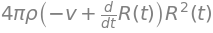

In [65]:
rho = sympy.Symbol('rho', positive=True) # Stellar density
v = sympy.Symbol('v', positive=True) # Stellar envelope expansion velocity
M_r_dot_expr = 4*sympy.pi*rho*R(t)**2*(R(t).diff(t)-v)
M_r_dot_expr

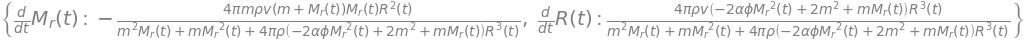

In [66]:
aux_derivs = sympy.solve([M_r(t).diff(t) - M_r_dot_expr, R(t).diff(t)/R(t) - eqn_3],
                         [M_r(t).diff(t), R(t).diff(t)], dict=True)[0]
aux_derivs

In [67]:
x_def = M_r(t)/m
x_def

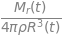

In [68]:
y_def = M_r(t)/(4*sympy.pi*R(t)**3*rho)
y_def

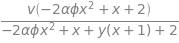

In [69]:
x = sympy.Symbol('x', positive=True) # Auxiliary variable
y = sympy.Symbol('y', positive=True) # Auxiliary variable
temp = eqn_3*R(t)
temp = temp.subs(aux_derivs)
temp = temp.subs(sympy.solve(y-y_def,R(t),dict=True)[0])
temp = temp.subs(M_r(t),x*m)
temp = temp.simplify()
eqn_4 = temp
eqn_4

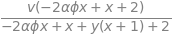

In [76]:
temp = 2*alpha*phi*x**2/(1+x)/x
temp += x/(1+x)
temp -= 2
temp = y/temp
temp -= 1
temp = -v/temp
paper_eqn_4 = temp.simplify()
paper_eqn_4

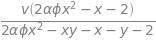

In [74]:
temp = 2*alpha*phi*x**2/(1+x)
temp += x/(1+x)
temp -= 2
temp = y/temp
temp -= 1
temp = -v/temp
corrected_paper_eqn_4 = temp.simplify()
corrected_paper_eqn_4

In [75]:
temp = paper_eqn_4/eqn_4
temp.simplify()

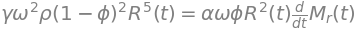

In [78]:
gamma = sympy.Symbol('gamma', positive=True) # Drag coefficient
eqn_5 = sympy.Eq(gamma*rho*(1-phi)**2*omega**2*R(t)**5,
                 alpha*M_r(t).diff(t)*phi*omega*R(t)**2)
eqn_5

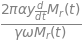

In [93]:
delta_def = alpha*y*M_r(t).diff(t)/(gamma*omega*M_r(t))*2*sympy.pi
delta_def

In [95]:
delta = sympy.Symbol('delta', positive=True) # Auxiliary parameter
temp = sympy.solve(eqn_5, phi)[0]
temp = temp.subs(sympy.solve(delta-delta_def,M_r(t).diff(t),dict=True)[0])
temp = temp.subs(sympy.solve(y-y_def,R(t),dict=True)[0])
temp = temp.simplify()
eqn_6 = temp
eqn_6

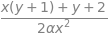

In [107]:
temp = eqn_4
temp = sympy.fraction(temp)[1]
temp = sympy.solve(temp, phi)[0]
temp = temp.simplify()
eqn_7 = temp
eqn_7